In [5]:
import osmnx as ox
import geopandas as gpd
import pandas as pd
import pickle

# Facility Locations

In [ ]:
Nepal_pois = ox.pois_from_place(place='Nepal')

In [ ]:
pickle.dump( Nepal_pois, open( "nepal_pois.p", "wb" ) )

In [7]:
Nepal_pois = pickle.load( open( "TestBooks/nepal_pois.p", "rb" ) )


In [11]:
Nepal_pois.amenity.value_counts().head(5)


school              9945
place_of_worship    3922
restaurant          2884
bank                1885
pharmacy             942
Name: amenity, dtype: int64

In [12]:
nepal_hospitals = Nepal_pois [Nepal_pois.amenity =='hospital']

In [25]:
nepal_hospitals = nepal_hospitals[nepal_hospitals.element_type == 'node']

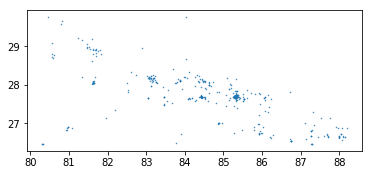

In [33]:
nepal_hospitals.plot(markersize=0.2)

In [29]:
hospital_coordinates = pd.DataFrame([point.coords[0] for point in pd.Series(nepal_hospitals.geometry)],columns=["longitude","latitude"])

In [32]:
hospital_coordinates.to_csv("Data/Nepal_Prepared_Data/hospital.csv")

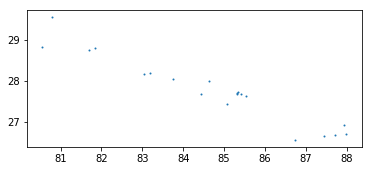

In [69]:
sample = nepal_hospitals.sample(20)
sample.plot(markersize=1)

In [70]:
sample_coordinates = pd.DataFrame([point.coords[0] for point in pd.Series(sample.geometry)],columns=["longitude","latitude"])

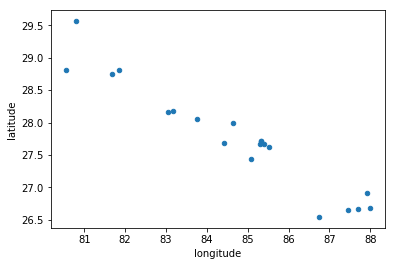

In [76]:
sample_coordinates.plot('longitude', 'latitude', kind='scatter',)

In [78]:
sample_coordinates.to_csv("Data/Nepal_Prepared_Data/sample_hospitals.csv", index=False)